##**Лабораторна робота 3: Вибiр моделi, розширення та дiагностика**

**Мета**

Метою цiєї лабораторiї є дослiдження методiв розширеного вибору моделей, надiйної дiагностики,
нелiнiйних перетворень та ефектiв взаємодiї.

Команда 7: Анастасія Бурдим, Вікторія Шевченко,  Марія Вербицька

[**Датасет ви знайдете тут**](https://www.kaggle.com/datasets/yasserh/song-popularity-dataset/discussion?sort=hotness)

**Song Popularity Analysis**
13 незалежних змінних, залежна змінна – **audio valence**

In [ ]:
url <- "https://raw.githubusercontent.com/mverbytska/song-data-project/refs/heads/main/df_songs.csv"
df <- read.csv(url)

In [ ]:
head(df)

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>
1,45,297986,0.50100,0.484,0.381,0.000000,6,0.114,-13.232,1,0.0361,144.939,4,0.409
2,57,205452,0.58700,0.711,0.702,0.000080,11,0.186,-6.677,1,0.1540,74.023,4,0.861
3,41,273113,0.69400,0.933,0.462,0.000126,4,0.103,-9.671,1,0.1270,130.086,4,0.942
4,40,175694,0.15800,0.817,0.753,0.000000,8,0.103,-4.977,1,0.2500,112.978,4,0.517
5,69,202721,0.93800,0.665,0.287,0.149000,8,0.103,-14.923,1,0.0400,133.924,4,0.386
6,48,162613,0.00407,0.694,0.603,0.030800,1,0.116,-8.190,1,0.0523,170.028,4,0.654


### **0. Попередні оцінки та результати**

Завантажте та перевiрте набiр даних
`summary(data)`

In [ ]:
summary(df)

 song_popularity song_duration_ms  acousticness        danceability   
 Min.   : 0.00   Min.   : 53066   Min.   :0.0000014   Min.   :0.0855  
 1st Qu.:41.75   1st Qu.:183440   1st Qu.:0.0282750   1st Qu.:0.5380  
 Median :57.00   Median :210622   Median :0.1410000   Median :0.6475  
 Mean   :53.95   Mean   :216809   Mean   :0.2639107   Mean   :0.6385  
 3rd Qu.:69.00   3rd Qu.:242540   3rd Qu.:0.4232500   3rd Qu.:0.7550  
 Max.   :99.00   Max.   :577226   Max.   :0.9960000   Max.   :0.9810  
     energy        instrumentalness        key            liveness      
 Min.   :0.00289   Min.   :0.000000   Min.   : 0.000   Min.   :0.02220  
 1st Qu.:0.50700   1st Qu.:0.000000   1st Qu.: 2.000   1st Qu.:0.09337  
 Median :0.67500   Median :0.000009   Median : 5.000   Median :0.12100  
 Mean   :0.64211   Mean   :0.080942   Mean   : 5.152   Mean   :0.18012  
 3rd Qu.:0.81000   3rd Qu.:0.002472   3rd Qu.: 8.000   3rd Qu.:0.22500  
 Max.   :0.99700   Max.   :0.962000   Max.   :11.000   Max.   :0.

Вiзуалiзуйте зв’язки мiж предикторами та залежною змiнною за допомогою дiаграм розсiювання та кореляцiйних матриць:


```
car::scatterplotMatrix(data, col = 1, regLine = list(col = 2),
smooth = list(col.smooth = 4, col.spread = 4))

```




In [ ]:
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



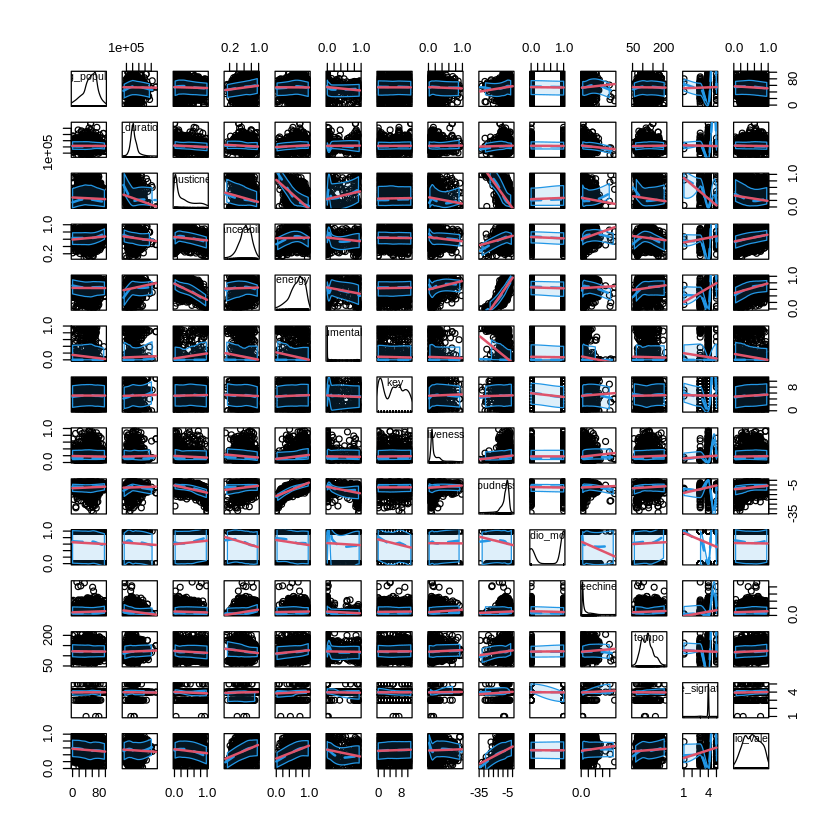

In [ ]:
car::scatterplotMatrix(df, col = 1, regLine = list(col = 2),
                        smooth = list(col.smooth = 4, col.spread = 4))

### **Завдання 1: Вибiр моделi**





**1. Пiдiбрати модель повної множинної лiнiйної регресiї**

- Побудуйте модель за усiх предикторами `mod <- lm(y ˜ ., data)`.

- Оцiнiть придатнiсть моделi за допомогою `summary(mod)`.


In [ ]:
# point 1
mod <- lm(df$audio_valence ~ ., data = df)
summary(mod)


Call:
lm(formula = df$audio_valence ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60917 -0.14301 -0.00233  0.15409  0.55801 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -4.941e-01  9.200e-02  -5.371 8.76e-08 ***
song_popularity  -1.093e-03  2.215e-04  -4.933 8.78e-07 ***
song_duration_ms -1.202e-07  8.344e-08  -1.441 0.149728    
acousticness      1.868e-01  2.200e-02   8.491  < 2e-16 ***
danceability      5.526e-01  3.248e-02  17.012  < 2e-16 ***
energy            6.953e-01  3.924e-02  17.719  < 2e-16 ***
instrumentalness -1.655e-01  2.278e-02  -7.265 5.34e-13 ***
key               2.511e-03  1.299e-03   1.933 0.053374 .  
liveness         -2.132e-02  3.268e-02  -0.652 0.514173    
loudness         -1.476e-02  2.035e-03  -7.252 5.87e-13 ***
audio_mode        2.111e-02  9.815e-03   2.150 0.031639 *  
speechiness      -6.278e-02  4.533e-02  -1.385 0.166239    
tempo             5.872e-04  1.663e-04   3.532 0

**Коментарі:**

За результатом t-тесту та обрахованого p-value, більшість змінних моделі є адекватними та потрібними. Однак, для змінних *song_duration_ms*, *liveness*, *speechiness*, *time_signature* значення p-value є більшим за 0.05, що надає підстави прийняти нульову гіпотезу про рівність цих коефіцієнтів 0.

Для змінної *key* значення p-value рівне **0.05**, тож рішення про включення чи виключення цього предиктора буде прийматися на основі подальших досліджень.

Для змінної *audio_mode* p-value рівне **0.03**, що є меншим за встановлений рівень, але в порівнянні з іншими значеннями це є доволі високим. Тож певною мірою предиктор *audio_mode* може опинитися в зоні ризику в контексті використання цієї змінної в побудові якісної моделі.

**2. Поетапний вибiр з AIC i BIC**
- Виконайте покроковий вибiр за допомогою `MASS::stepAIC()` як для AIC, так i для BIC
```
mod_AIC <- MASS::stepAIC(model, direction = "both", k = 2)
mod_BIC <- MASS::stepAIC(model, direction = "both", k = log(nrow(data)))
```



















In [ ]:
# point 2 (AIC)
mod_AIC <- MASS::stepAIC(mod, direction = "both", k = 2)

Start:  AIC=-6307.06
df$audio_valence ~ song_popularity + song_duration_ms + acousticness + 
    danceability + energy + instrumentalness + key + liveness + 
    loudness + audio_mode + speechiness + tempo + time_signature

                   Df Sum of Sq    RSS     AIC
- liveness          1    0.0181 84.233 -6308.6
- time_signature    1    0.0509 84.266 -6307.9
- speechiness       1    0.0813 84.296 -6307.1
<none>                          84.215 -6307.1
- song_duration_ms  1    0.0881 84.303 -6307.0
- key               1    0.1584 84.373 -6305.3
- audio_mode        1    0.1961 84.411 -6304.4
- tempo             1    0.5289 84.744 -6296.5
- song_popularity   1    1.0318 85.247 -6284.7
- loudness          1    2.2299 86.445 -6256.8
- instrumentalness  1    2.2380 86.453 -6256.6
- acousticness      1    3.0573 87.272 -6237.7
- danceability      1   12.2718 96.487 -6037.0
- energy            1   13.3139 97.529 -6015.5

Step:  AIC=-6308.63
df$audio_valence ~ song_popularity + song_duration

**Коментарі:**

За результатами критерію Akaike для двостороннього тесту, було проведено 5 ітерацій, і було отримане найкраще  значення AIC = **-6309.72**. Початкова модель містила всі **13** змінних. **Кінцева** модель побудована за допомогою **9 незалежних змінних**. У ході ітераційного відкидання й додавання предикторів було відкинути 4 з них, а саме: *song_duration_ms*, *speechiness*, *time_signature*, *liveness*. Цей результат відповідає t-тесту під час створення моделі лінійної регресії для всіх незалежних змінних, оскільки саме для цих 4х ми прийняли нульову гіпотезу про рівність коефіцієнтів нулю.

In [ ]:
# point 2 (BIC)
mod_BIC <- MASS::stepAIC(mod, direction = "both", k = log(nrow(df)))

Start:  AIC=-6228.65
df$audio_valence ~ song_popularity + song_duration_ms + acousticness + 
    danceability + energy + instrumentalness + key + liveness + 
    loudness + audio_mode + speechiness + tempo + time_signature

                   Df Sum of Sq    RSS     AIC
- liveness          1    0.0181 84.233 -6235.8
- time_signature    1    0.0509 84.266 -6235.0
- speechiness       1    0.0813 84.296 -6234.3
- song_duration_ms  1    0.0881 84.303 -6234.2
- key               1    0.1584 84.373 -6232.5
- audio_mode        1    0.1961 84.411 -6231.6
<none>                          84.215 -6228.6
- tempo             1    0.5289 84.744 -6223.7
- song_popularity   1    1.0318 85.247 -6211.9
- loudness          1    2.2299 86.445 -6184.0
- instrumentalness  1    2.2380 86.453 -6183.8
- acousticness      1    3.0573 87.272 -6164.9
- danceability      1   12.2718 96.487 -5964.2
- energy            1   13.3139 97.529 -5942.7

Step:  AIC=-6235.82
df$audio_valence ~ song_popularity + song_duration

**Коментарі:**

За результатами Байєсівського критерію для двостороннього тесту, було проведено 7 ітерацій, і було отримане найкраще  значення AIC = **-6261.51**. Початкова модель містила всі **13** змінних. **Кінцева** модель побудована за допомогою **7 незалежних змінних**. У ході ітераційного відкидання й додавання предикторів було відкинути 6 з них, а саме: *song_duration_ms*, *speechiness*, *time_signature*, *liveness*, *audio_mode*, *key*. Для перших 4-х змінних цей результат дублює отриманий раніше для AIC тесту. Останні 2 змінні – *audio_mode* та *key* – за результатами t-тесту на початку дослідження мали значення p-value **0.03** та **0.05** відповідно, і за Байєсівським критерієм ми маємо відкинути їх задля побудови більш точної моделі. Ця відмінність у результатах критеріїв Akaike та Байєсівського демонструє більшу строгість другого, оскільки він пропонує відкинути більшу кількість змінних, а також фінальний результат критерію для BIC не є таким низьким (у рамках AIC та BIC тестів, чим нижче значення критерію, тим краще поводиться модель), як для AIC, що теж підкреслює його "суворість".


**3. Backward, Forward i Both пiдхiд**
- Використовуйте функцiю stepAIC з рiзними стратегiями вiдбору моделi (backward,
forward, both).
- Оцiнiть вiдмiнностi в обраних моделях за допомогою: ```car::compareCoefs(mod_AIC,
mod_BIC)```
- Порiвняйте фiнальнi моделi, якi отриманi рiзними методами.

In [ ]:

mod_backward <- MASS::stepAIC(mod, direction = "backward")

Start:  AIC=-6307.06
df$audio_valence ~ song_popularity + song_duration_ms + acousticness + 
    danceability + energy + instrumentalness + key + liveness + 
    loudness + audio_mode + speechiness + tempo + time_signature

                   Df Sum of Sq    RSS     AIC
- liveness          1    0.0181 84.233 -6308.6
- time_signature    1    0.0509 84.266 -6307.9
- speechiness       1    0.0813 84.296 -6307.1
<none>                          84.215 -6307.1
- song_duration_ms  1    0.0881 84.303 -6307.0
- key               1    0.1584 84.373 -6305.3
- audio_mode        1    0.1961 84.411 -6304.4
- tempo             1    0.5289 84.744 -6296.5
- song_popularity   1    1.0318 85.247 -6284.7
- loudness          1    2.2299 86.445 -6256.8
- instrumentalness  1    2.2380 86.453 -6256.6
- acousticness      1    3.0573 87.272 -6237.7
- danceability      1   12.2718 96.487 -6037.0
- energy            1   13.3139 97.529 -6015.5

Step:  AIC=-6308.63
df$audio_valence ~ song_popularity + song_duration

In [ ]:
mod_null <- lm(df$audio_valence ~ 1, data = df)
mod_forward <- MASS::stepAIC(mod_null, direction = "forward", scope = list(lower = mod_null, upper = mod))


Start:  AIC=-5702.73
df$audio_valence ~ 1

                   Df Sum of Sq    RSS     AIC
+ energy            1   13.1065 102.31 -5941.8
+ danceability      1    9.8887 105.53 -5879.9
+ loudness          1    6.4654 108.95 -5816.0
+ instrumentalness  1    4.2478 111.17 -5775.7
+ acousticness      1    2.2939 113.12 -5740.9
+ time_signature    1    0.7816 114.63 -5714.3
+ song_popularity   1    0.6252 114.79 -5711.6
+ speechiness       1    0.5162 114.90 -5709.7
+ tempo             1    0.3499 115.06 -5706.8
+ key               1    0.2415 115.17 -5704.9
<none>                          115.42 -5702.7
+ song_duration_ms  1    0.0948 115.32 -5702.4
+ liveness          1    0.0555 115.36 -5701.7
+ audio_mode        1    0.0059 115.41 -5700.8

Step:  AIC=-5941.82
df$audio_valence ~ energy

                   Df Sum of Sq     RSS     AIC
+ danceability      1    9.3007  93.008 -6130.4
+ instrumentalness  1    1.7865 100.522 -5975.0
+ acousticness      1    1.3462 100.963 -5966.3
+ song_popul

**Коментарі:**

Для моделі AIC досліджені типи ітерації backward і forward дали однакові резульати: AIC = **-6309.72**, що також дорівнює значення AIC для двостороннього типу ітерації. Це значення було досягнуто за рівну кількість ітерації – 5, тож суттєвих змін через застосування різних підходів не було виявлено.

In [ ]:
#вiдмiнностi в обраних моделях
car::compareCoefs(mod_AIC, mod_BIC)

Calls:
1: lm(formula = df$audio_valence ~ song_popularity + acousticness + 
  danceability + energy + instrumentalness + key + loudness + audio_mode + 
  tempo, data = df)
2: lm(formula = df$audio_valence ~ song_popularity + acousticness + 
  danceability + energy + instrumentalness + loudness + tempo, data = df)

                   Model 1   Model 2
(Intercept)        -0.4419   -0.4115
SE                  0.0560    0.0549
                                    
song_popularity  -0.001104 -0.001113
SE                0.000221  0.000222
                                    
acousticness        0.1886    0.1908
SE                  0.0218    0.0218
                                    
danceability        0.5500    0.5417
SE                  0.0314    0.0312
                                    
energy              0.6903    0.6903
SE                  0.0387    0.0387
                                    
instrumentalness   -0.1630   -0.1680
SE                  0.0227    0.0227
                  

**Коментарі:**

Порівнявши моделі AIC та BIC, бачимо, що отримані коефіцієнти дуже схожі між собою. Також спостерігається більша схожість більших коефіцієнтів (чим ближчий коефіцієнт до 0, тим більш присутня варіативність).

**4. Оцiнiть продуктивнiсть моделi**
- Порiвняйте скоригованi R^2
, AIC i BIC для рiзних моделей.
- Обговорiть спiввiдношення мiж складнiстю моделi та точнiстю прогнозування.


In [ ]:
cat("AIC model R-squared:", summary(mod_AIC)$r.squared,
    "\nAIC model Adjusted R-squared:", summary(mod_AIC)$adj.r.squared, "\n")

AIC model R-squared: 0.2683811 
AIC model Adjusted R-squared: 0.2650723 


In [ ]:
cat("BIC model R-squared:", summary(mod_BIC)$r.squared,
    "\nBIC model Adjusted R-squared:", summary(mod_BIC)$adj.r.squared, "\n")

BIC model R-squared: 0.2656651 
BIC model Adjusted R-squared: 0.2630846 


**Коментарі:**

Оцінка R-squared і adjusted R-squared показує, що різниця між моделями не є суттєвою: значення коливаються в діапазоні +-0.003, що означає, що простіша за кількістю змінних модель BIC може бути прийнятною для роботи з нею далі, оскільки дає адекватний результат, при цьому має легшу архітектуру.

### **Завдання 2: Розширення моделi**

1. Трансформацiї та пiдгонка моделi
- Логарифмiчне перетворення `mod_log <- lm(y ˜ log(x), data)`
- Експоненцiальне перетворення `mod_exp <- lm(log(y) ˜ x, data)`
- Зворотне перетворення `mod_inv <- lm(y ˜ I(1/x), data)`

*Це подивитися по скатерплоту на початку*

Логарифмічне перетворення (log(x)) – якщо y зростає швидко при малих x, а потім сповільнюється.

Експоненційне перетворення (log(y)) – якщо y має експоненційний тренд, тобто зростає або спадає експоненційно.

Зворотне перетворення (1/x) – якщо y зменшується при зростанні x, і графік має вигляд гіперболи.  



In [ ]:
mod_exp <- lm(log1p(audio_valence) ~ ., data=df)
summary(mod_exp)


Call:
lm(formula = log1p(audio_valence) ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45488 -0.09263  0.00603  0.10509  0.37125 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -2.638e-01  6.134e-02  -4.301 1.78e-05 ***
song_popularity  -7.157e-04  1.477e-04  -4.846 1.36e-06 ***
song_duration_ms -7.514e-08  5.563e-08  -1.351 0.176977    
acousticness      1.189e-01  1.467e-02   8.105 9.12e-16 ***
danceability      3.642e-01  2.166e-02  16.818  < 2e-16 ***
energy            4.555e-01  2.616e-02  17.408  < 2e-16 ***
instrumentalness -1.141e-01  1.519e-02  -7.515 8.56e-14 ***
key               1.701e-03  8.661e-04   1.964 0.049654 *  
liveness         -9.437e-03  2.179e-02  -0.433 0.665019    
loudness         -9.241e-03  1.357e-03  -6.812 1.27e-11 ***
audio_mode        1.334e-02  6.544e-03   2.038 0.041691 *  
speechiness      -3.063e-02  3.022e-02  -1.013 0.310961    
tempo             3.779e-04  1.109e-04   3.4

**Коментарі:**

Для нашої моделі, ми обрали виконати експоненційне перетворення (використавши 1+n, аби уникнути помилок у разі негативного або нульового значення цільової змінної), адже за висновком, зробленим по скаттерплоту відносно цільової змінної, можна побачити трохи експоненційний патерн. Порівнюючи класичну модель з моделлю з експоненційним перетворенням, можна побачити, що друга має вищі значення R-squared і Adjusted R-squared, а також вище значення F статистики. Щодо t-тесту для незалежних змінних, модель з перетворенням має ті самі результати по перевірці p-value щодо прийняття нульової гіпотези про рівність наступних коефіцієнтів нулю: *song_duration_ms*, *liveness*, *speechiness*, *time_signature*. Тож, модель із експоненційним перетворенням можна буде розглянути в подальших експериментах.

2. Полiном та взаємодiя
- Моделi полiномiальної регресiї:
```
mod_poly_1 <- lm(y ~ poly(x, degree = 2), data)
summary(mod_poly_1)
```
- Перевiрка на потенцiйнi нелiнiйнi зв’язки, включивши полiноми.
```
mod_poly_2 <- lm(Y ~ poly(x1, 2) + poly(x2, 2), data)
summary(mod_poly_2)
```
- Моделi iз взаємодiєю:
```
mod_interact <- lm(y ~ x1 * x2, data)
summary(mod_interact)
```




In [ ]:
mod_poly_1_danceability <- lm(audio_valence ~ poly(danceability, degree = 2), data=df)
summary(mod_poly_1_danceability)


Call:
lm(formula = audio_valence ~ poly(danceability, degree = 2), 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56638 -0.17802 -0.00083  0.18042  0.51680 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      0.530921   0.005116 103.779  < 2e-16 ***
poly(danceability, degree = 2)1  3.144623   0.228789  13.745  < 2e-16 ***
poly(danceability, degree = 2)2 -0.997221   0.228789  -4.359 1.37e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2288 on 1997 degrees of freedom
Multiple R-squared:  0.0943,	Adjusted R-squared:  0.09339 
F-statistic:   104 on 2 and 1997 DF,  p-value: < 2.2e-16


In [ ]:
mod_poly_1_energy <- lm(audio_valence ~ poly(energy, degree = 2), data=df)
summary(mod_poly_1_energy)


Call:
lm(formula = audio_valence ~ poly(energy, degree = 2), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56682 -0.16699 -0.00357  0.17336  0.55507 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.530921   0.005026 105.635  < 2e-16 ***
poly(energy, degree = 2)1  3.620296   0.224770  16.107  < 2e-16 ***
poly(energy, degree = 2)2 -1.190573   0.224770  -5.297 1.31e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2248 on 1997 degrees of freedom
Multiple R-squared:  0.1258,	Adjusted R-squared:  0.125 
F-statistic: 143.7 on 2 and 1997 DF,  p-value: < 2.2e-16


In [ ]:
mod_poly_1_loudness <- lm(audio_valence ~ poly(loudness, degree = 2), data=df)
summary(mod_poly_1_loudness)


Call:
lm(formula = audio_valence ~ poly(loudness, degree = 2), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.54289 -0.18581 -0.00563  0.17963  0.58456 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  0.530921   0.005218  101.74   <2e-16 ***
poly(loudness, degree = 2)1  2.542711   0.233374   10.89   <2e-16 ***
poly(loudness, degree = 2)2 -0.431683   0.233374   -1.85   0.0645 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2334 on 1997 degrees of freedom
Multiple R-squared:  0.05763,	Adjusted R-squared:  0.05669 
F-statistic: 61.07 on 2 and 1997 DF,  p-value: < 2.2e-16


In [ ]:
mod_poly_2 <- lm(audio_valence ~ poly(danceability, 2) + poly(energy, 2)+ poly(loudness,2), data=df)
summary(mod_poly_2)


Call:
lm(formula = audio_valence ~ poly(danceability, 2) + poly(energy, 
    2) + poly(loudness, 2), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59285 -0.15620 -0.00458  0.16032  0.55179 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.530921   0.004771 111.277  < 2e-16 ***
poly(danceability, 2)1  3.235885   0.229813  14.081  < 2e-16 ***
poly(danceability, 2)2 -0.499471   0.218749  -2.283   0.0225 *  
poly(energy, 2)1        5.277697   0.354432  14.891  < 2e-16 ***
poly(energy, 2)2       -0.407947   0.287473  -1.419   0.1560    
poly(loudness, 2)1     -2.277143   0.369801  -6.158  8.9e-10 ***
poly(loudness, 2)2     -0.466324   0.261885  -1.781   0.0751 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2134 on 1993 degrees of freedom
Multiple R-squared:  0.2138,	Adjusted R-squared:  0.2114 
F-statistic: 90.34 on 6 and 1993 DF,  p-value: < 2.2e-16


In [ ]:
mod_poly_2_2 <- lm(audio_valence ~ poly(danceability, 2) + poly(energy, 2), data=df)
summary(mod_poly_2_2)


Call:
lm(formula = audio_valence ~ poly(danceability, 2) + poly(energy, 
    2), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60899 -0.15872 -0.00548  0.16828  0.55921 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.53092    0.00482 110.151   <2e-16 ***
poly(danceability, 2)1  3.01268    0.22956  13.124   <2e-16 ***
poly(danceability, 2)2 -0.54240    0.21824  -2.485    0.013 *  
poly(energy, 2)1        3.47086    0.21748  15.960   <2e-16 ***
poly(energy, 2)2       -0.11691    0.23029  -0.508    0.612    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2156 on 1995 degrees of freedom
Multiple R-squared:  0.1968,	Adjusted R-squared:  0.1952 
F-statistic: 122.2 on 4 and 1995 DF,  p-value: < 2.2e-16


In [ ]:
mod_interact_dancebility_energy <- lm(audio_valence ~ danceability * energy, data=df)
summary(mod_interact)


Call:
lm(formula = audio_valence ~ danceability * energy, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.61071 -0.15753 -0.01039  0.16596  0.55906 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.10041    0.05072   1.980 0.047873 *  
danceability         0.28860    0.08447   3.417 0.000647 ***
energy               0.23265    0.07738   3.007 0.002675 ** 
danceability:energy  0.23573    0.12992   1.814 0.069763 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2157 on 1996 degrees of freedom
Multiple R-squared:  0.1955,	Adjusted R-squared:  0.1943 
F-statistic: 161.7 on 3 and 1996 DF,  p-value: < 2.2e-16


In [ ]:
mod_interact_dancebility_energy_loudness <- lm(audio_valence ~ danceability * energy * loudness, data=df)
summary(mod_interact_dancebility_energy_loudness)


Call:
lm(formula = audio_valence ~ danceability * energy * loudness, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59797 -0.15393 -0.00679  0.16190  0.55419 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   0.302434   0.123911   2.441 0.014744 *  
danceability                 -0.292722   0.196958  -1.486 0.137381    
energy                       -0.101418   0.147181  -0.689 0.490860    
loudness                      0.015852   0.006456   2.455 0.014158 *  
danceability:energy           0.910758   0.244429   3.726 0.000200 ***
danceability:loudness        -0.039422   0.011866  -3.322 0.000909 ***
energy:loudness              -0.028446   0.014846  -1.916 0.055501 .  
danceability:energy:loudness  0.028757   0.025599   1.123 0.261423    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.213 on 1992 degrees of freedom
Multiple R-squared:  0.2171,	A

### **Conclusions**

- Узагальнiть результати вибору моделi.
- Обговорiть вплив полiномiв та взаємодiї у моделях.
- Надайте рекомендацiї щодо майбутнiх пiдходiв до моделювання.


**Висновки:**
1. mod_AIC вийшла найкращою з усіх, які ми досліджували, за результатами R-squared та Adjusted R-squared, оскільки обидва значення вийшли більшими за 0.265.
2. Поліноміальні моделі можуть бути корисними для наших даних, оскільки змінні, що мають найбільший вплив на продуктивність моделі (наприклад, *danceability* та *energy*), мають нелінійний звʼязок з *audio_valence*.
3. У подальшому аналізі варто використати зменшення розмірності, оскільки наразі датасет містить 13 незалежних змінних, але далеко не всі вони справді впливають на модель. Також варто розглянути лінійні комбінації факторів.
